## Imports {-}

In [1]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import re
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import spacy
nlp = spacy.load('en_core_web_sm')
all_stopwords = nlp.Defaults.stop_words
lemmatizer = WordNetLemmatizer()
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

from typing import List
import sys

sys.path.append('.')
import pandas as pd
import os

import string
from nltk.corpus import stopwords
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import gensim
import gensim.corpora as corpora
import gensim.models

import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'/mallet-2.0.8'})
from gensim.models import CoherenceModel

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from pprint import pprint

distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None


In [3]:
topic_modeling_df = pd.read_csv('/Users/JoKerry/Desktop/CSML1030 - Machine Learning Capstone/mimic_admissions_and_discharge/2 TFIDF/Admissions/mimic_data_admissions_for_tm.csv')
topic_modeling_df

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HADM_ID  SEQ_NUM  ICD9_CODE  \
0       153714        1       5849   
1       174834        1      51881   
2       101463        1       5849   
3       123285        1      51881   
4       115665        1      51881   
...        ...      ...        ...   
31972   179548       32       4019   
31973   133827       32      53081   
31974   154989       32      53081   
31975   129551       36       4019   
31976   170349       39      53081   

                                                CATEGORY  \
0      ['Echo', 'ECG', 'Discharge summary', 'Radiolog...   
1      ['Echo', 'ECG', 'Discharge summary', 'Radiolog...   
2      ['Discharge summary', 'ECG', 'Radiology', 'Echo']   
3      ['Discharge summary', 'ECG', 'Nursing/other', ...   
4      ['Echo', 'ECG', 'Discharge summary', 'Radiolog...   
...                                                  ...   
31972               ['Discharge summary', 'ECG', 'Echo']   
31973  ['Discharge summary', 'ECG', 'Radiology', 'Echo']   
31974  ['Echo', 'ECG', 'Discharge summary', 'Radiolog...   
31975  ['Discharge summary', 'ECG', 'Radiology', 'Echo']   
31976               ['Discharge summary', 'ECG', 'Echo']   

                                                    TEXT             AGE  \
0      CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...         [0, 51]   
1      CHIEF COMPLAINT: Shortness of Breath/Dyspnea o...  [56, 0, 2, 55]   
2      CHIEF COMPLAINT: Transfer for STEs\n\nPRESENT ...             [0]   
3      CHIEF COMPLAINT: shortness of breath, diplopia...         [0, 70]   
4      CHIEF COMPLAINT: shortness of breath\n\nPRESEN...     [0, 68, 69]   
...                                                  ...             ...   
31972  CHIEF COMPLAINT: Weakness/Fluid Overload\n\nPR...         [0, 79]   
31973  CHIEF COMPLAINT: Shortness of breath\n\nPRESEN...         [0, 73]   
31974  CHIEF COMPLAINT: anuric s/p cadaver renal tran...     [0, 61, 62]   
31975  CHIEF COMPLAINT: Somnolence, elevated bilirubi...         [0, 51]   
31976  CHIEF COMPLAINT: Chest pain - initial presenti...         [0, 78]   

      GENDER         DOB                  DOD             DOD_HOSP  \
0          M  2108-05-25                  NaN                  NaN   
1          F  2054-01-28  2113-04-21 00:00:00                  NaN   
2          F  1856-12-22                  NaN                  NaN   
3          F  2062-09-14                  NaN                  NaN   
4          F  2072-09-27  2144-07-21 00:00:00  2144-07-21 00:00:00   
...      ...         ...                  ...                  ...   
31972      M  2103-01-20  2182-10-22 00:00:00  2182-10-22 00:00:00   
31973      M  2121-01-10  2196-03-05 00:00:00                  NaN   
31974      M  2080-10-27  2142-10-12 00:00:00  2142-10-12 00:00:00   
31975      M  2108-12-14  2160-05-23 00:00:00  2160-05-23 00:00:00   
31976      F  2054-05-20  2133-04-06 00:00:00  2133-04-06 00:00:00   

                   DOD_SSN  EXPIRE_FLAG  AGE_recalculated  ROW_ID_y  \
0                      NaN            0                51     29492   
1      2113-04-21 00:00:00            1                56     24932   
2                      NaN            0               300     58365   
3                      NaN            0                70     11794   
4      2144-07-21 00:00:00            1                68     25514   
...                    ...          ...               ...       ...   
31972                  NaN            1                79     48580   
31973  2196-03-05 00:00:00            1                73     48045   
31974  2142-10-12 00:00:00            1                61     30465   
31975  2160-05-23 00:00:00            1                51     51769   
31976                  NaN            1                78     45831   

       SUBJECT_ID ADMISSION_TYPE  
0           24136      EMERGENCY  
1           20425      EMERGENCY  
2           98040      EMERGENCY  
3            9644      EMERGENCY  
4           20907      EMERGENCY  
...         

## Cleaning Text {-}

In [4]:
my_stop_words = ['discharge', 'diagnosis', 'medications', 'medication', 'disposition', 'condition', 'instructions', 
                 'status', 'secondary', 'changes', 'instruction', 'change', 'home', 'name', 'hospital', 'daily',
                'hour', 'follow', 'care', 'time', 'day', 'week', 'with', 'disp', 'discharged', 'admitted', 
                 'namepattern', 'none']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
X = topic_modeling_df.TEXT

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # Remove new line characters
    document = document.replace("\n", ' ')
    # Punctuation
    document = re.sub(r'[^\w\s]', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    #Removing Numbers
    document = ''.join(i for i in document if not i.isdigit())
    #Removing Stopwords
    document = ' '.join([i for i in document.split() if not i in all_stopwords])
    #Removing certain sized words
    document = ' '.join([i for i in document.split() if len(i)>3])
    # Contractions
    document = contractions.fix(document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    #Removing my_stop_words
    document = ' '.join([i for i in document.split() if not i in my_stop_words])
    
    #return document
    documents.append(document)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
documents

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['chief complaint present illness this year gentleman diagnosed month cardiomyopathy following viral illness inferior apical akinesis ejection fraction estimated percent sent stable cardiac renal function heart failure regiment prior admission began feel unwell nasal congestion fatigue five prior admission began experience nausea vomiting diarrhea evidence blood difficult keeping fluid able prior admission noted feeling cloudy thought confused brought emergency room location university college admission previously started regimen newly diagnosed viral cardiomyopathy including coreg coumadin lasix lisinopril changed valsartan when presented found reported creatinine potassium thought acute renal failure given liter normal saline bicarbonate insulin glucose kayexalate hyperkalemia transferred reported chest pain palpitation abdominal pain melena numbness tingling foot shortness breath lower extremity edema medical history notable viral cardiomyopathy diagnosed ejection fraction percent h

In [8]:
tokenized_words = [word_tokenize(i) for i in documents]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
tokenized_words

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['chief',
  'complaint',
  'present',
  'illness',
  'this',
  'year',
  'gentleman',
  'diagnosed',
  'month',
  'cardiomyopathy',
  'following',
  'viral',
  'illness',
  'inferior',
  'apical',
  'akinesis',
  'ejection',
  'fraction',
  'estimated',
  'percent',
  'sent',
  'stable',
  'cardiac',
  'renal',
  'function',
  'heart',
  'failure',
  'regiment',
  'prior',
  'admission',
  'began',
  'feel',
  'unwell',
  'nasal',
  'congestion',
  'fatigue',
  'five',
  'prior',
  'admission',
  'began',
  'experience',
  'nausea',
  'vomiting',
  'diarrhea',
  'evidence',
  'blood',
  'difficult',
  'keeping',
  'fluid',
  'able',
  'prior',
  'admission',
  'noted',
  'feeling',
  'cloudy',
  'thought',
  'confused',
  'brought',
  'emergency',
  'room',
  'location',
  'university',
  'college',
  'admission',
  'previously',
  'started',
  'regimen',
  'newly',
  'diagnosed',
  'viral',
  'cardiomyopathy',
  'including',
  'coreg',
  'coumadin',
  'lasix',
  'lisinopril',
  'chan

In [10]:
topic_modeling_series = pd.Series(tokenized_words)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
topic_modeling_series

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [chief, complaint, present, illness, this, yea...
1        [chief, complaint, shortness, breath, dyspnea,...
2        [chief, complaint, transfer, stes, present, il...
3        [chief, complaint, shortness, breath, diplopia...
4        [chief, complaint, shortness, breath, present,...
                               ...                        
31972    [chief, complaint, weakness, fluid, overload, ...
31973    [chief, complaint, shortness, breath, present,...
31974    [chief, complaint, anuric, cadaver, renal, tra...
31975    [chief, complaint, somnolence, elevated, bilir...
31976    [chief, complaint, chest, pain, initial, prese...
Length: 31977, dtype: object

## Topic Modeling {-}

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(topic_modeling_series) #use entire corpus
id2word.filter_extremes(no_below=20, no_above=0.1)

# Create Corpus
texts = topic_modeling_series

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
print(id2word)

Dictionary(8420 unique tokens: ['adopted', 'akinesis', 'apical', 'approximate', 'began']...)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating {}-topic model'.format(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
limit=20; start=2; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=texts,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating 2-topic model
Calculating 3-topic model
Calculating 4-topic model
Calculating 5-topic model
Calculating 6-topic model
Calculating 7-topic model
Calculating 8-topic model
Calculating 9-topic model
Calculating 10-topic model
Calculating 11-topic model
Calculating 12-topic model
Calculating 13-topic model
Calculating 14-topic model
Calculating 15-topic model
Calculating 16-topic model
Calculating 17-topic model
Calculating 18-topic model
Calculating 19-topic model


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


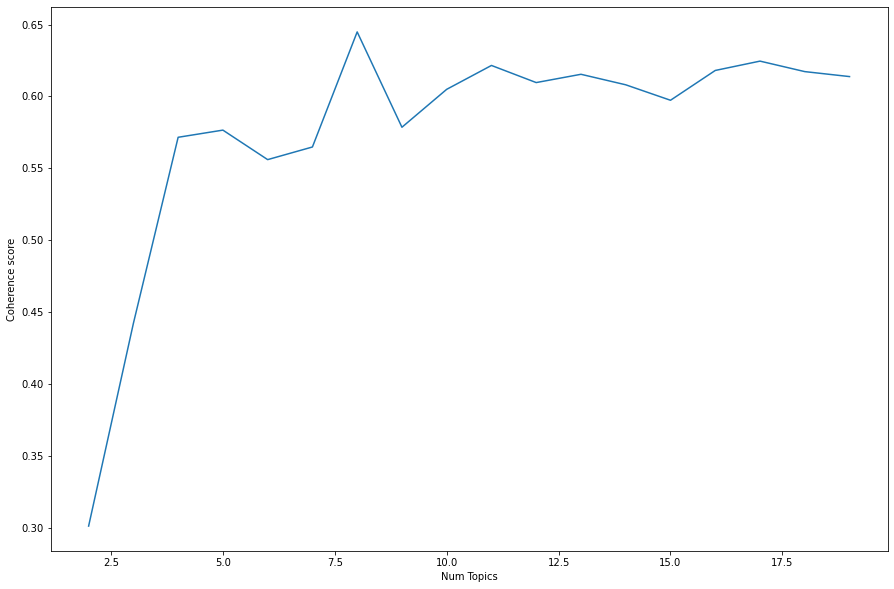

In [16]:
# show graph
x = range(start, limit, step)
plt.figure(figsize=(15, 10))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 2  has Coherence Value of 0.301234
Num Topics = 3  has Coherence Value of 0.442161
Num Topics = 4  has Coherence Value of 0.571583
Num Topics = 5  has Coherence Value of 0.57657
Num Topics = 6  has Coherence Value of 0.556056
Num Topics = 7  has Coherence Value of 0.564839
Num Topics = 8  has Coherence Value of 0.644858
Num Topics = 9  has Coherence Value of 0.57857
Num Topics = 10  has Coherence Value of 0.604933
Num Topics = 11  has Coherence Value of 0.621536
Num Topics = 12  has Coherence Value of 0.60963
Num Topics = 13  has Coherence Value of 0.615391
Num Topics = 14  has Coherence Value of 0.608084
Num Topics = 15  has Coherence Value of 0.597329
Num Topics = 16  has Coherence Value of 0.618053
Num Topics = 17  has Coherence Value of 0.624549
Num Topics = 18  has Coherence Value of 0.617253
Num Topics = 19  has Coherence Value of 0.613795


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Building LDA Model = LDA Model removing my_stop_words & featuring 30 topics
lda_model_optimal = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pprint(lda_model_optimal.print_topics(num_topics=8, num_words=15))
doc_lda = lda_model_optimal[corpus]

[(0,
  '0.017*"seizure" + 0.014*"fracture" + 0.009*"command" + 0.009*"facial" + '
  '0.008*"motor" + 0.008*"speech" + 0.008*"awake" + 0.008*"trauma" + '
  '0.008*"eye" + 0.007*"disorder" + 0.007*"hemorrhage" + 0.007*"fell" + '
  '0.007*"reflex" + 0.006*"reactive" + 0.006*"hand"'),
 (1,
  '0.007*"grossly" + 0.006*"breast" + 0.006*"foot" + 0.006*"qday" + '
  '0.005*"dysuria" + 0.005*"feeling" + 0.005*"feel" + 0.005*"sensation" + '
  '0.005*"cervical" + 0.005*"obesity" + 0.005*"swelling" + 0.004*"obese" + '
  '0.004*"pleasant" + 0.004*"reported" + 0.004*"associated"'),
 (2,
  '0.087*"mouth" + 0.065*"capsule" + 0.051*"needed" + 0.041*"release" + '
  '0.033*"other" + 0.028*"prescribed" + 0.026*"provider" + 0.023*"delayed" + '
  '0.016*"bedtime" + 0.014*"solution" + 0.012*"refill" + 0.011*"inhalation" + '
  '0.010*"extended" + 0.009*"sustained" + 0.009*"sodium"'),
 (3,
  '0.011*"rehab" + 0.009*"afib" + 0.008*"prednisone" + 0.007*"foley" + '
  '0.006*"date" + 0.006*"senna" + 0.005*"sodium" + 

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_optimal.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_optimal, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.943687337700339

Coherence Score:  0.5172377776712352


In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_optimal, corpus, id2word)
vis

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.070522 -0.180992       1        1  21.329955
3      0.102154 -0.008531       2        1  16.816000
4     -0.029413 -0.270306       3        1  14.864266
7     -0.094497 -0.036103       4        1  13.596732
6     -0.139513  0.094749       5        1  12.389451
0     -0.140882  0.062821       6        1   9.999276
5     -0.057562  0.300864       7        1   6.517102
2      0.430235  0.037498       8        1   4.487217, topic_info=          Term          Freq         Total Category  logprob  loglift
322      mouth  12054.000000  12054.000000  Default  30.0000  30.0000
568    capsule   9069.000000   9069.000000  Default  29.0000  29.0000
253     needed   7074.000000   7074.000000  Default  28.0000  28.0000
632    release   5689.000000   5689.000000  Default  27.0000  27.0000
168      other   7085.000000   7085.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
793     sodium   1253.436384   4534.720564   Topic8  -4.7061   1.8181
500    sulfate   1020.031828   3512.046729   Topic8  -4.9122   1.8676
744   docusate    940.941310   3095.837569   Topic8  -4.9929   1.9130
989   tartrate    707.828087   2307.172541   Topic8  -5.2776   1.9224
531  injection    666.204726   1627.806346   Topic8  -5.3382   2.2105

[448 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1663      3  0.225729  abnormal
1663      4  0.027476  abnormal
1663      6  0.145414  abnormal
1663      7  0.600677  abnormal
809       6  0.999478  abrasion
...     ...       ...       ...
1812      1  0.999497     worse
510       4  0.880023     wound
510       5  0.025807     wound
510       7  0.094053     wound
4570      6  0.998845     wrist

[731 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 8, 7, 1, 6, 3])

## Creating Vectors For Probabilities {-}

In [23]:
#lda_output = lda_model_optimal.transform(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
vector = lda_model_optimal[corpus]  # get topic probability distribution for a document

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
vector

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def Extract(vector):
    return [item[0] for item in vector]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
vector_prob = Extract(vector)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
vector_prob

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 0.023803806),
  (1, 0.51494366),
  (2, 0.017035184),
  (3, 0.038117353),
  (4, 0.21884349),
  (6, 0.10916929),
  (7, 0.07239172)],
 [(0, 0.028036907),
  (1, 0.4872505),
  (3, 0.24814175),
  (4, 0.024141897),
  (6, 0.11603329),
  (7, 0.08583239)],
 [(0, 0.38594255),
  (1, 0.10047743),
  (3, 0.10561865),
  (4, 0.21540192),
  (6, 0.012485154),
  (7, 0.16839756)],
 [(0, 0.06359886),
  (1, 0.26828414),
  (2, 0.1268103),
  (3, 0.054689415),
  (4, 0.10698633),
  (5, 0.054448538),
  (6, 0.08151829),
  (7, 0.24366409)],
 [(0, 0.18430524),
  (1, 0.17650537),
  (2, 0.02379748),
  (3, 0.2129038),
  (4, 0.05160584),
  (6, 0.24264482),
  (7, 0.10377489)],
 [(0, 0.13126905),
  (1, 0.174061),
  (3, 0.31275582),
  (4, 0.11000053),
  (6, 0.2159338),
  (7, 0.04498627)],
 [(0, 0.036847234),
  (1, 0.1512807),
  (2, 0.010876063),
  (3, 0.31497103),
  (4, 0.07580529),
  (6, 0.15696876),
  (7, 0.24984796)],
 [(0, 0.042685945),
  (1, 0.1101195),
  (3, 0.34673157),
  (4, 0.061236113),
  (6, 0.17587331),
 

## Align Index With Column Titles {-}

In [29]:
vector_prob_df = pd.DataFrame(vector_prob, columns=[0,1,2,3,4,5,6,7])
vector_prob_df.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                1                 2                 3  \
0  (0, 0.023803806)  (1, 0.51494366)  (2, 0.017035184)  (3, 0.038117353)   
1  (0, 0.028036907)   (1, 0.4872505)   (3, 0.24814175)  (4, 0.024141897)   
2   (0, 0.38594255)  (1, 0.10047743)   (3, 0.10561865)   (4, 0.21540192)   
3   (0, 0.06359886)  (1, 0.26828414)    (2, 0.1268103)  (3, 0.054689415)   
4   (0, 0.18430524)  (1, 0.17650537)   (2, 0.02379748)    (3, 0.2129038)   

                  4                 5                6                7  
0   (4, 0.21884349)   (6, 0.10916929)  (7, 0.07239172)             None  
1   (6, 0.11603329)   (7, 0.08583239)             None             None  
2  (6, 0.012485154)   (7, 0.16839756)             None             None  
3   (4, 0.10698633)  (5, 0.054448538)  (6, 0.08151829)  (7, 0.24366409)  
4   (4, 0.05160584)   (6, 0.24264482)  (7, 0.10377489)             None

In [30]:
def clean_df(df):
    #Create empty dataframe copy
    df2 = pd.DataFrame(np.zeros(df.shape), columns = df.columns)
    nrows = df.shape[0]
    ncolumns = df.shape[1]
    #Populate empty dataframe
    for i in range(nrows):
        #Create key:value pair of each row
        rowdict = dict(zip([x[0] for x in df.iloc[i] if x != None], [x[1] for x in df.iloc[i] if x != None]))
        #Populate row based off of 
        for j in range(ncolumns):
            if j in rowdict.keys():
                df2.iloc[i][j] = rowdict[j]
            else:
                df2.iloc[i][j] = None
    return df2

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
vector_prob_df_align = clean_df(vector_prob_df)
vector_prob_df_align.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2         3         4         5         6  \
0  0.023804  0.514944  0.017035  0.038117  0.218843       NaN  0.109169   
1  0.028037  0.487251       NaN  0.248142  0.024142       NaN  0.116033   
2  0.385943  0.100477       NaN  0.105619  0.215402       NaN  0.012485   
3  0.063599  0.268284  0.126810  0.054689  0.106986  0.054449  0.081518   
4  0.184305  0.176505  0.023797  0.212904  0.051606       NaN  0.242645   

          7  
0  0.072392  
1  0.085832  
2  0.168398  
3  0.243664  
4  0.103775

In [32]:
vector_prob_df_align.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31977 entries, 0 to 31976
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       31015 non-null  float64
 1   1       31973 non-null  float64
 2   2       18754 non-null  float64
 3   3       31974 non-null  float64
 4   4       31913 non-null  float64
 5   5       21601 non-null  float64
 6   6       31795 non-null  float64
 7   7       31973 non-null  float64
dtypes: float64(8)
memory usage: 2.0 MB


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
vector_prob_df_align

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2         3         4         5         6  \
0      0.023804  0.514944  0.017035  0.038117  0.218843       NaN  0.109169   
1      0.028037  0.487251       NaN  0.248142  0.024142       NaN  0.116033   
2      0.385943  0.100477       NaN  0.105619  0.215402       NaN  0.012485   
3      0.063599  0.268284  0.126810  0.054689  0.106986  0.054449  0.081518   
4      0.184305  0.176505  0.023797  0.212904  0.051606       NaN  0.242645   
...         ...       ...       ...       ...       ...       ...       ...   
31972       NaN  0.121452  0.061931  0.374097  0.264927  0.046421  0.041068   
31973  0.044791  0.117123       NaN  0.270503  0.306220       NaN  0.116357   
31974  0.011556  0.071846  0.022136  0.323171  0.116138       NaN  0.051127   
31975  0.097985  0.049860  0.046682  0.243367  0.015391       NaN  0.102855   
31976  0.042482  0.319186  0.033945  0.131151  0.370417       NaN  0.040134   

              7  
0      0.072392  
1      0.085832  
2      0.168398  
3      0.243664  
4      0.103775  
...         ...  
31972  0.080912  
31973  0.134837  
31974  0.398064  
31975  0.439400  
31976  0.060940  

[31977 rows x 8 columns]

In [34]:
topics = vector_prob_df_align
labels = topic_modeling_df['ICD9_CODE']
age = topic_modeling_df['AGE_recalculated']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
topic_modeling_results = pd.concat([age, labels, topics], axis=1)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE_recalculated  ICD9_CODE         0         1         2         3  \
0                    51       5849  0.023804  0.514944  0.017035  0.038117   
1                    56      51881  0.028037  0.487251       NaN  0.248142   
2                   300       5849  0.385943  0.100477       NaN  0.105619   
3                    70      51881  0.063599  0.268284  0.126810  0.054689   
4                    68      51881  0.184305  0.176505  0.023797  0.212904   
...                 ...        ...       ...       ...       ...       ...   
31972                79       4019       NaN  0.121452  0.061931  0.374097   
31973                73      53081  0.044791  0.117123       NaN  0.270503   
31974                61      53081  0.011556  0.071846  0.022136  0.323171   
31975                51       4019  0.097985  0.049860  0.046682  0.243367   
31976                78      53081  0.042482  0.319186  0.033945  0.131151   

              4         5         6         7  
0      0.218843       NaN  0.109169  0.072392  
1      0.024142       NaN  0.116033  0.085832  
2      0.215402       NaN  0.012485  0.168398  
3      0.106986  0.054449  0.081518  0.243664  
4      0.051606       NaN  0.242645  0.103775  
...         ...       ...       ...       ...  
31972  0.264927  0.046421  0.041068  0.080912  
31973  0.306220       NaN  0.116357  0.134837  
31974  0.116138       NaN  0.051127  0.398064  
31975  0.015391       NaN  0.102855  0.439400  
31976  0.370417       NaN  0.040134  0.060940  

[31977 rows x 10 columns]

In [36]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE_recalculated        0
ICD9_CODE               0
0                     962
1                       4
2                   13223
3                       3
4                      64
5                   10376
6                     182
7                       4
dtype: int64

In [37]:
topic_modeling_results = topic_modeling_results.fillna(0)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE_recalculated  ICD9_CODE         0         1         2         3  \
0                    51       5849  0.023804  0.514944  0.017035  0.038117   
1                    56      51881  0.028037  0.487251  0.000000  0.248142   
2                   300       5849  0.385943  0.100477  0.000000  0.105619   
3                    70      51881  0.063599  0.268284  0.126810  0.054689   
4                    68      51881  0.184305  0.176505  0.023797  0.212904   
...                 ...        ...       ...       ...       ...       ...   
31972                79       4019  0.000000  0.121452  0.061931  0.374097   
31973                73      53081  0.044791  0.117123  0.000000  0.270503   
31974                61      53081  0.011556  0.071846  0.022136  0.323171   
31975                51       4019  0.097985  0.049860  0.046682  0.243367   
31976                78      53081  0.042482  0.319186  0.033945  0.131151   

              4         5         6         7  
0      0.218843  0.000000  0.109169  0.072392  
1      0.024142  0.000000  0.116033  0.085832  
2      0.215402  0.000000  0.012485  0.168398  
3      0.106986  0.054449  0.081518  0.243664  
4      0.051606  0.000000  0.242645  0.103775  
...         ...       ...       ...       ...  
31972  0.264927  0.046421  0.041068  0.080912  
31973  0.306220  0.000000  0.116357  0.134837  
31974  0.116138  0.000000  0.051127  0.398064  
31975  0.015391  0.000000  0.102855  0.439400  
31976  0.370417  0.000000  0.040134  0.060940  

[31977 rows x 10 columns]

In [38]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE_recalculated    0
ICD9_CODE           0
0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
7                   0
dtype: int64

## Conforming AGE>100 to 90 {-}

In [41]:
topic_modeling_results['AGE_recalculated'] = np.where((topic_modeling_results.AGE_recalculated > 100), 90,topic_modeling_results.AGE_recalculated)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
topic_modeling_results[topic_modeling_results['AGE_recalculated']>100]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [AGE_recalculated, ICD9_CODE, 0, 1, 2, 3, 4, 5, 6, 7]
Index: []

In [44]:
topic_modeling_results['AGE_recalculated'].value_counts()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


90    1951
78     802
76     799
80     796
77     788
      ... 
0       13
18      12
17       5
16       2
89       2
Name: AGE_recalculated, Length: 76, dtype: int64

## Saving to CSV File {-}

In [45]:
topic_modeling_results.to_csv('mimic_data_tm_admissions_8_topics.csv', index=False)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Extracting Topic Words {-}

In [ ]:
# topic_words = lda_model_optimal.print_topics(num_topics=11, num_words=6)
# topic_words

In [ ]:
# type(topic_words)

In [ ]:
# def clean_txt(txt):
#     #remove text
#     txt = txt.replace("\n",' ')
#     #txt = txt.replace(remove_words, ' ')
#     #punctuation
#     txt = re.sub(r'[^\w\s]', ' ', txt)
#     #numbers removing
#     txt=''.join(i for i in txt if not i.isdigit())
#     TAG_RE = re.compile(r'<[^>]+>') 
#     txt = TAG_RE.sub('', txt.lower())
#     #tokenization of words
#     txt = word_tokenize(txt)
#     return txt

In [ ]:
# topic_words = str(topic_words)
# topic_words

In [ ]:
# topic_words_list = clean_txt(topic_words)
# topic_words_list

In [ ]:
# type(topic_words_list)

In [ ]:
# topic_words_list_series = pd.Series(topic_words_list)
# topic_words_list_series

In [ ]:
# topic_words_list_series.to_csv('topic_words_list_series_top_6_words_age_filtered.csv', index=False)